In [1]:
!pip install tensorflow keras numpy matplotlib pandas scikit-learn

^C
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 816.2 kB/s eta 0:00:00
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/50.1 kB ? eta -:--:--
     ---------------------------------------- 50.1/50.1 kB 1.3 MB/s eta 0:00:00
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------------------------------- ---- 92.2/104.0 kB 2.6 MB/s eta 0:00:01
     -------------------------------------  102.4/104.0 kB 1.5 MB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 997.0 kB/s eta 0:00:00
  Using cached scipy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_dir = '../Data/train/'
test_dir = '../Data/test/'

img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False) 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

C:\Users\sheha\Documents\Pneumonia\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stop, checkpoint])

C:\Users\sheha\Documents\Pneumonia\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.7514 - loss: 0.5803

163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 886ms/step - accuracy: 0.7513 - loss: 0.5800 - val_accuracy: 0.6168 - val_loss: 0.7928
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.7840 - loss: 0.4437

163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 531ms/step - accuracy: 0.7840 - loss: 0.4437 - val_accuracy: 0.6826 - val_loss: 0.5718
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8154 - loss: 0.3891

163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.8155 - loss: 0.3889 - val_accuracy: 0.7730 - val_loss: 0.4869
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.8771 - loss: 0.3090

163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 483ms/step - accuracy: 0.8771 - loss: 0.3090 - val_accuracy: 0.8109 - val_loss: 0.4318
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8869 - loss: 0.2632

163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 472ms/step - accuracy: 0.8869 - loss: 0.2631 - val_accuracy: 0.8914 - val_loss: 0.3066
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 466ms/step - accuracy: 0.8934 - loss: 0.2501 - val_accuracy: 0.7829 - val_loss: 0.4466
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 480ms/step - accuracy: 0.8974 - loss: 0.2500 - val_accuracy: 0.8783 - val_loss: 0.3160
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 438ms/step - accuracy: 0.8974 - loss: 0.2346 - val_accuracy: 0.8684 - val_loss: 0.3184
Epoch 9/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 435ms/step - accuracy: 0.9065 - loss: 0.2165 - val_accuracy: 0.8240 - val_loss: 0.3997
Epoch 10/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 436ms/step - accuracy: 0.9086 - loss: 0.2133 - val_accuracy: 0.8125 - val_loss: 0.4095


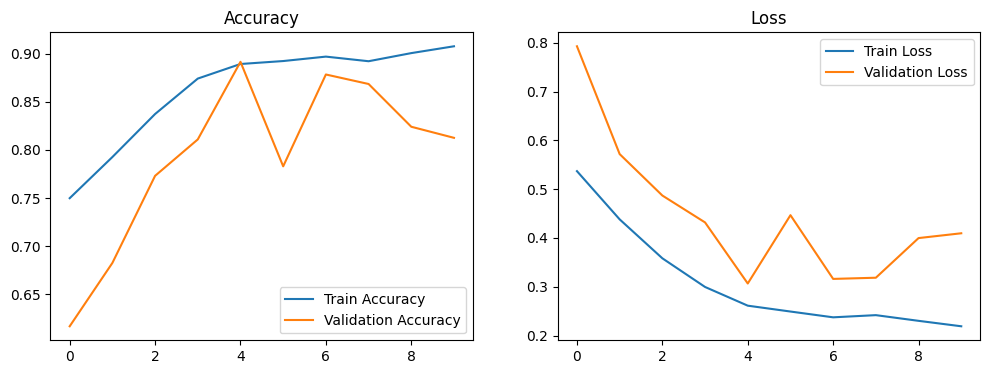

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.6778 - loss: 0.6835
Test accuracy: 0.8173
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step
              precision    recall  f1-score   support

      NORMAL       0.98      0.53      0.68       234
   PNEUMONIA       0.78      0.99      0.87       390

    accuracy                           0.82       624
   macro avg       0.88      0.76      0.78       624
weighted avg       0.85      0.82      0.80       624

Confusion Matrix:
[[123 111]
 [  3 387]]


In [6]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)  
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

conf_mat = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
PNEUMONIA detected (99.35% confidence)


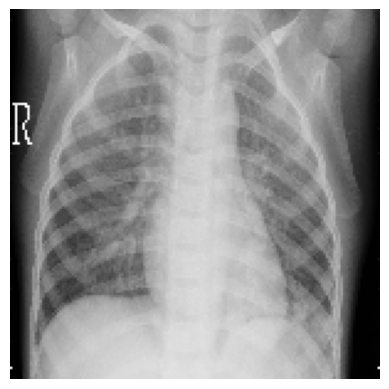

In [10]:
def predict_image(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print(f"PNEUMONIA detected ({prediction[0][0]:.2%} confidence)")
    else:
        print(f"Normal ({1-prediction[0][0]:.2%} confidence)")
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

predict_image('../Data/val/PNEUMONIA/person1950_bacteria_4881.jpeg')